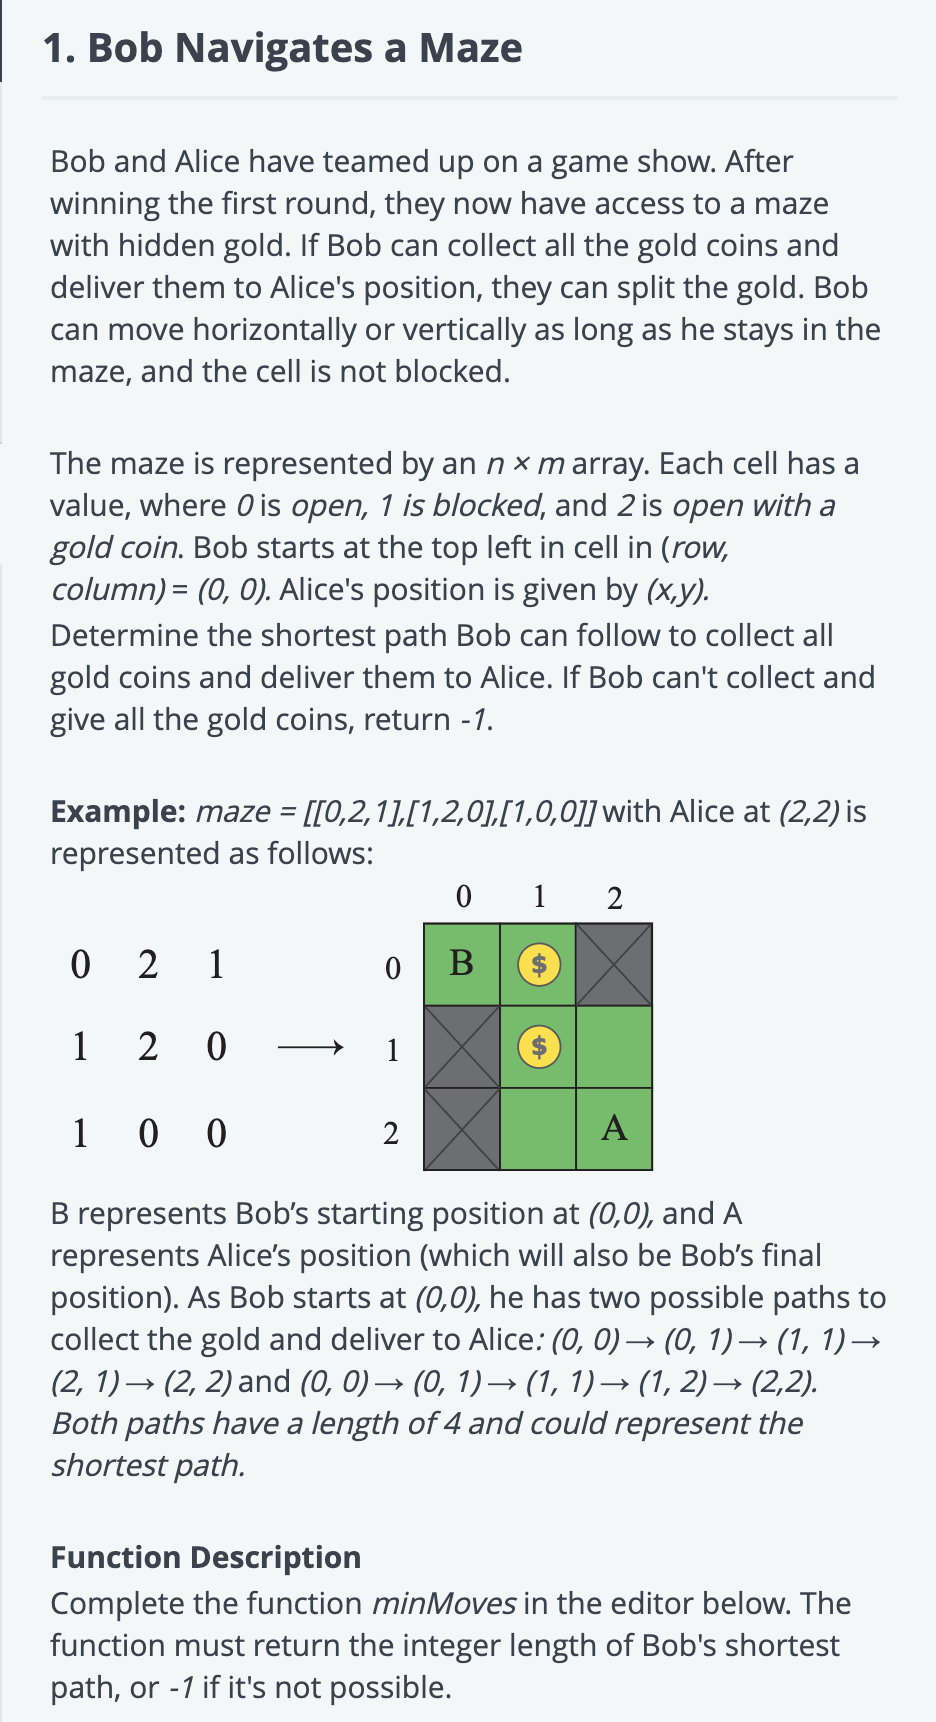

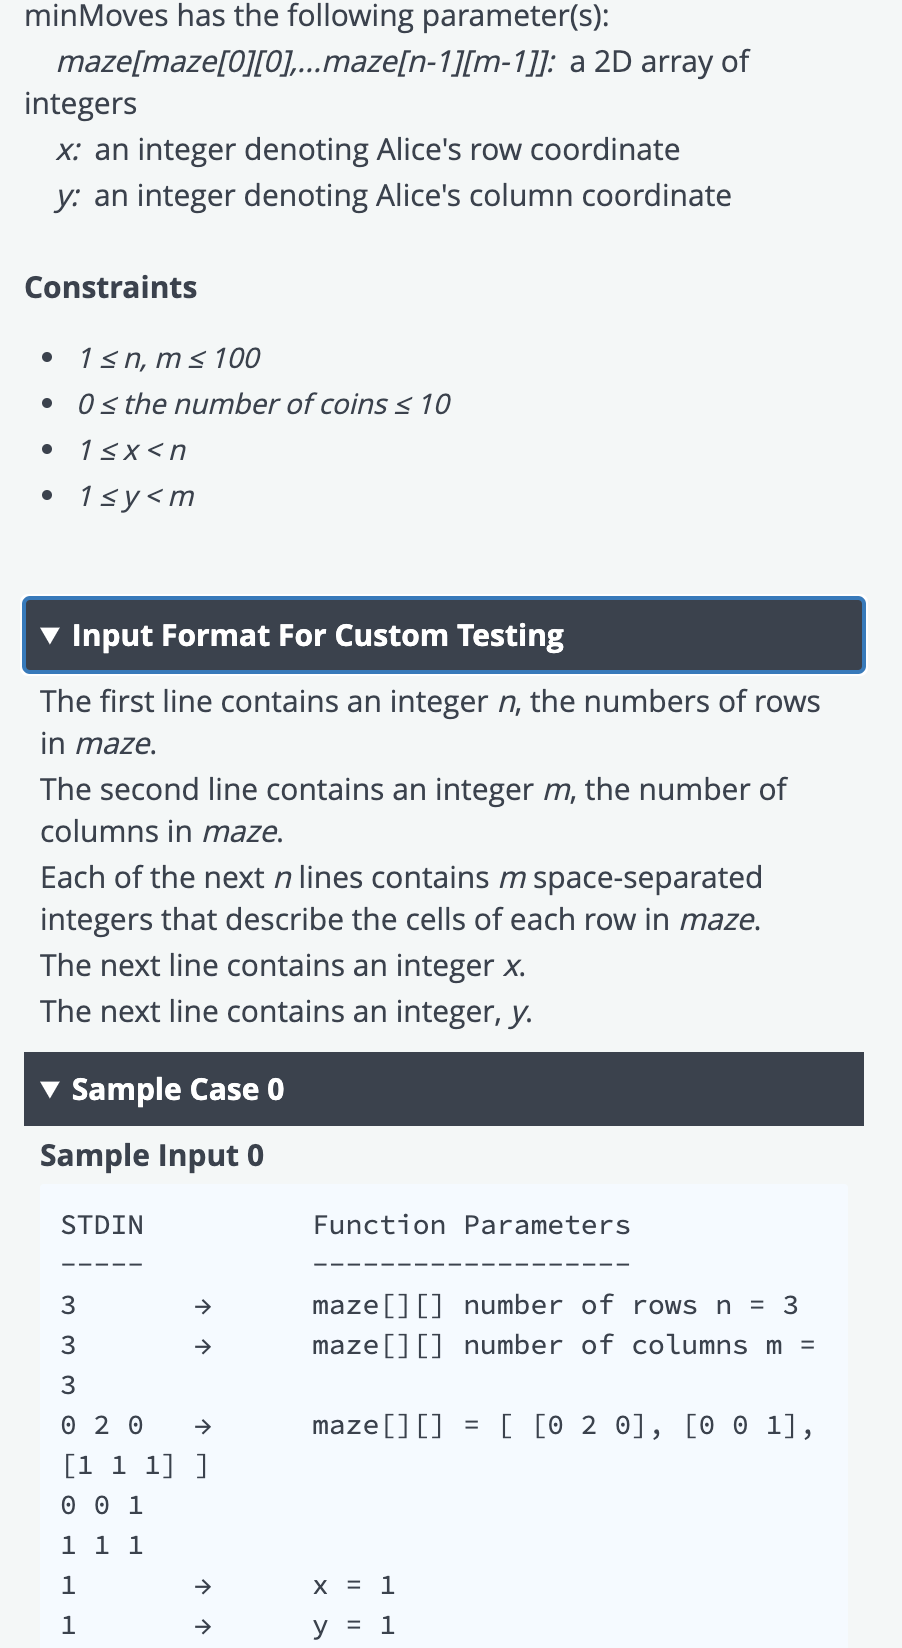

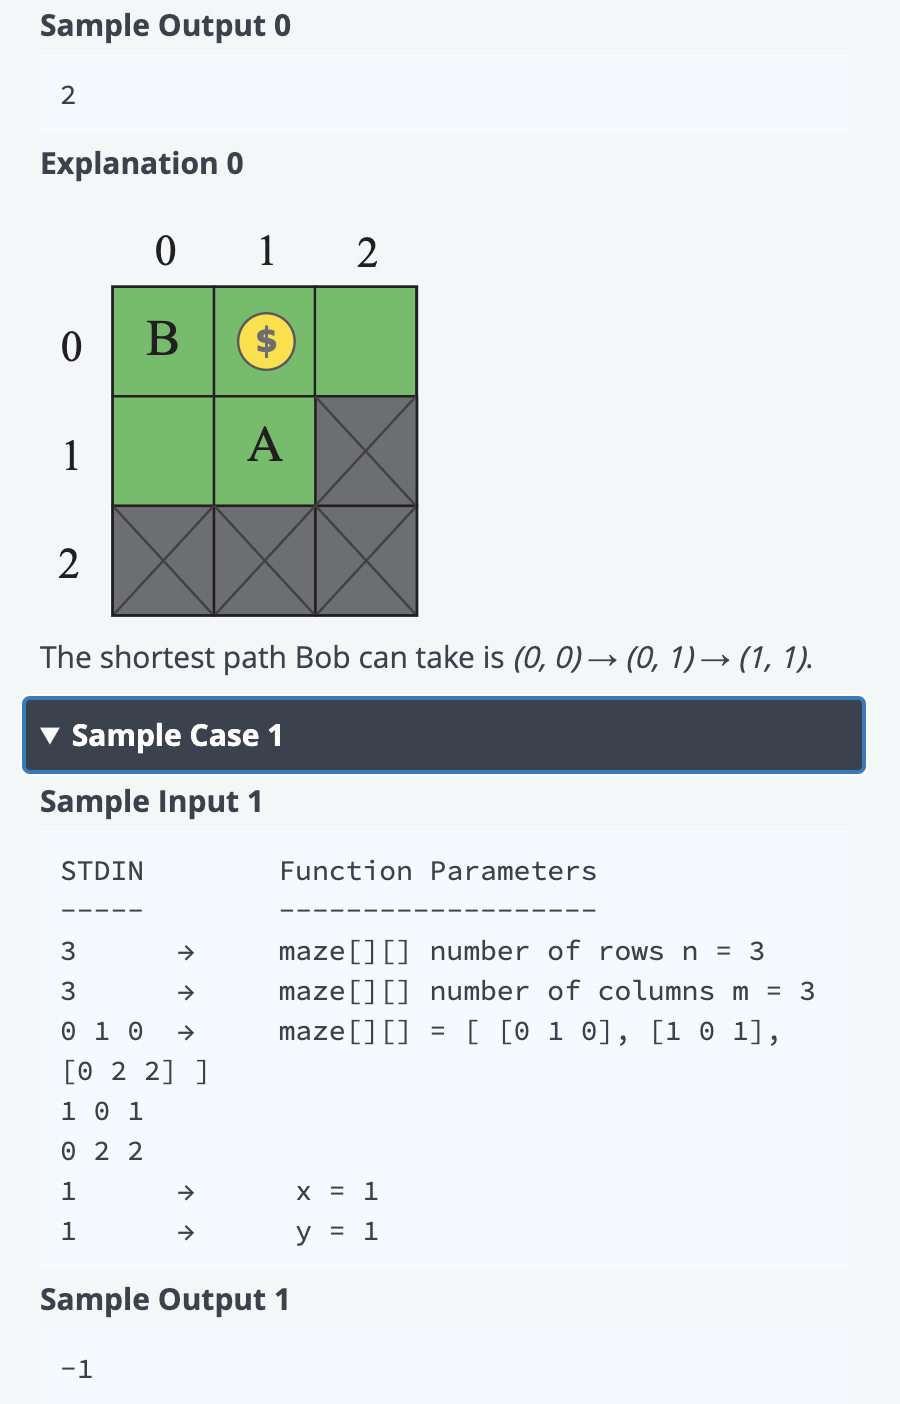

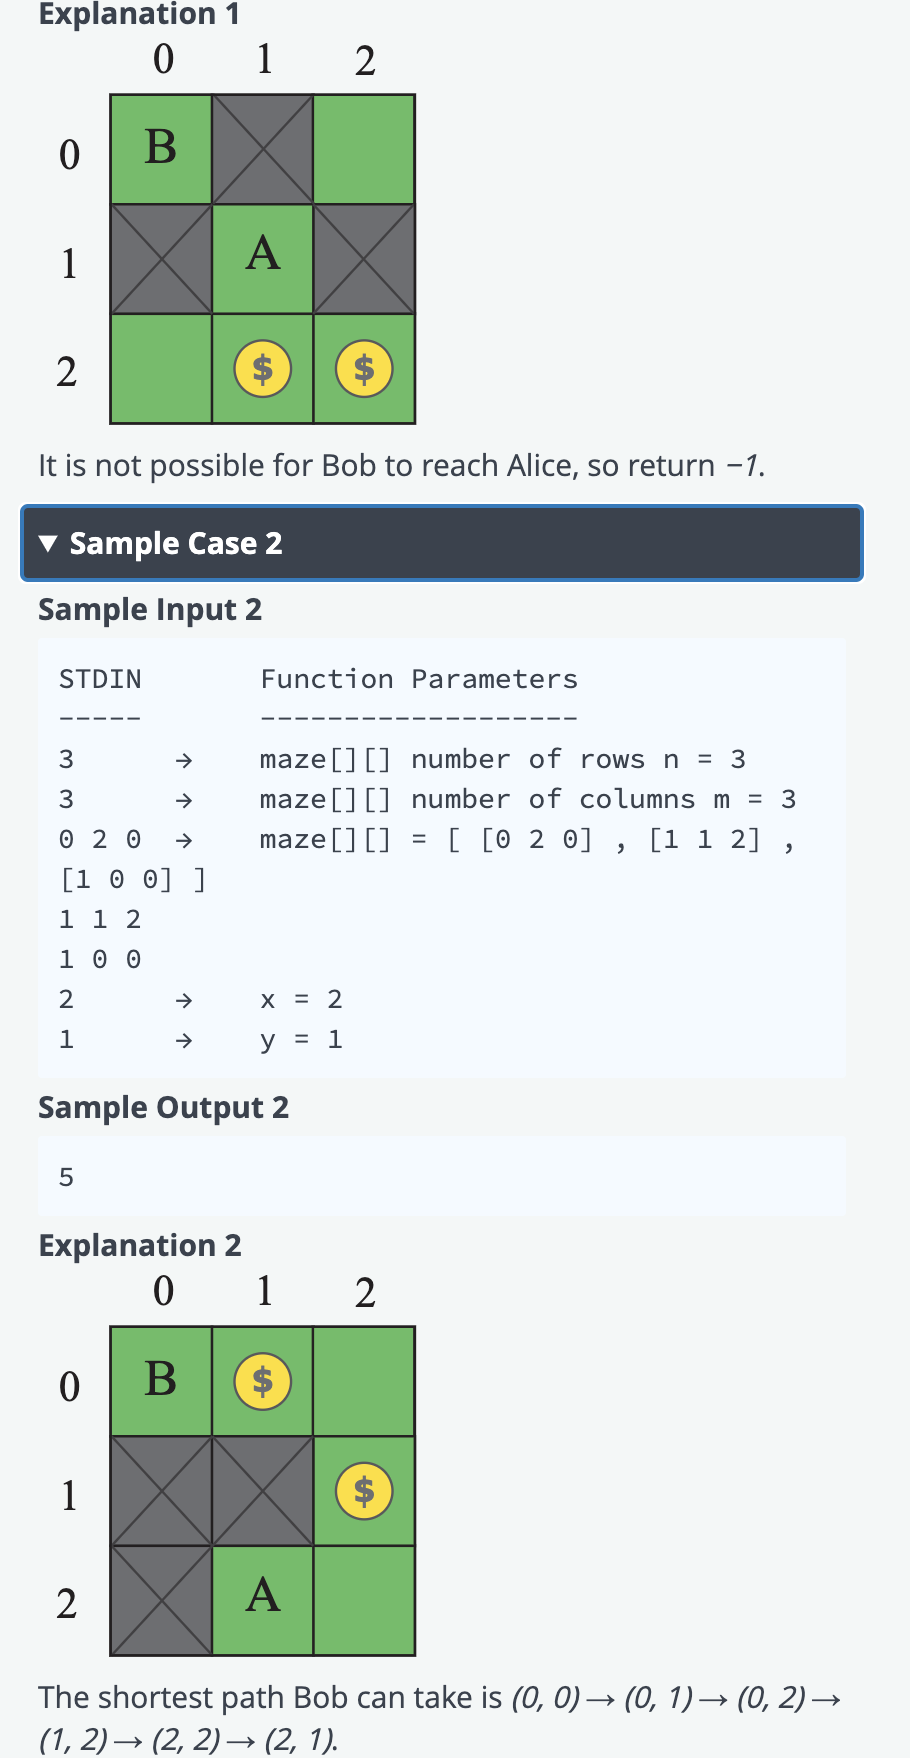

In [ ]:
#!/bin/python3

import math
import os
import random
import re
import sys


#
# Complete the 'minMoves' function below.
#
# The function is expected to return an INTEGER.
# The function accepts following parameters:
#  1. 2D_INTEGER_ARRAY maze
#  2. INTEGER x
#  3. INTEGER y
#
# code is reference to Wenxin Lin

import itertools
import copy
import queue

initial=[[-1,0],[1,0],[0,1],[0,-1]]

def size_jus(maze,x,y):
    if x<0 or y<0 or x>=len(maze)or y>=len(maze[0]):
        return False
    if maze[x][y]==1:
        return False
    return True
def bfs(maze,x,y,dist,dic_store):
    maze_len=len(maze)
    maze_width=len(maze[0])
    d_2=dic_store[(x,y)]
    q=queue.Queue(maxsize=1e10)
    vi_points=[[0 for i in range(maze_width)] for i in range(maze_len)]
    vi_points[x][y]=1
    q.put([x,y,0])
    while not q.empty():
        temporary=q.get()
        if temporary[2]> (maze_len*maze_width):
            return
        m = temporary[0]
        n = temporary[1]
        if maze[m][n]==2:
            dex=dic_store[(m,n)]
            dist[d_2][dex]=temporary[2]
            vi_points[m][n]=1
        for i in initial:
            s=size_jus(maze,m+i[0],n+i[1])
            if s:
                if not vi_points[m+i[0]][n+i[1]]:
                    vi_points[m+i[0]][n+i[1]]=1
                    q.put([m+i[0],n+i[1],temporary[2]+1])
    return

def minMoves(maze, x, y):
    # Write your code here
    defau_numb=1
    d={(0,0):0}
    for i in range(len(maze)):
        for j in range(len(maze[0])):
            if(maze[i][j]==2):
                d[(i,j)]=defau_numb
                defau_numb+=1
    d[(x,y)]=defau_numb
    maze[0][0]=2
    maze[x][y]=2
    dist=[[-1 for i in range(defau_numb+1)] for i in range(defau_numb+1)]
    for key in d:
        bfs(maze,key[0],key[1],dist,d)
    new_lst=list(range(1,defau_numb))
    r=1e10
    for i in itertools.permutations(new_lst):
        t=[0]
        t.extend(list(i))
        t.append(defau_numb)
        symbol=True
        sum_1=0
        start=0
        for j in range(1,len(t)):
            new_d=dist[t[start]][t[j]]
            if new_d==-1:
                symbol=False
                break
            sum_1+=new_d
            start=j
        if symbol and sum_1<r:
            r=sum_1
    if r==1e10:
        return -1
    return r


  

# def minMoves(maze, x, y):
#     # Write your code here
#     n = len(maze)
#     m = len(maze[0])
#     total = 0
#     for i in range(n):
#         for j in range(m):
#             if maze[i][j] == 2:
#                 total +=1
    
#     pts = set()
#     pts.add((0,0))
    
#     p = collections.deque([(0,0,0,0)])
    
#     while p:
#         l,k,ct,coins = p.popleft()
#         if maze[l][k] == 2:
#             coins +=1
#         if (l,k) == (x,y) and coins == total:
#             return ct
#         elif (l,k) == (x,y) and coins != total:
#             continue
        
#         for u,v in [(1,0),(0,1),(0,-1),(-1,0)]:
#             if 0<=l+u<n and 0<= k+v<m:
#                 if maze[l+u][k+v] == 1 or (l+u,k+v) in pts:
#                     continue
#                 if (l+u,k+v) != (x,y):
#                     pts.add((l+u,k+v))
#                     p.append((l+u,k+v, ct+1,coins))
#     return -1
    

if __name__ == '__main__':

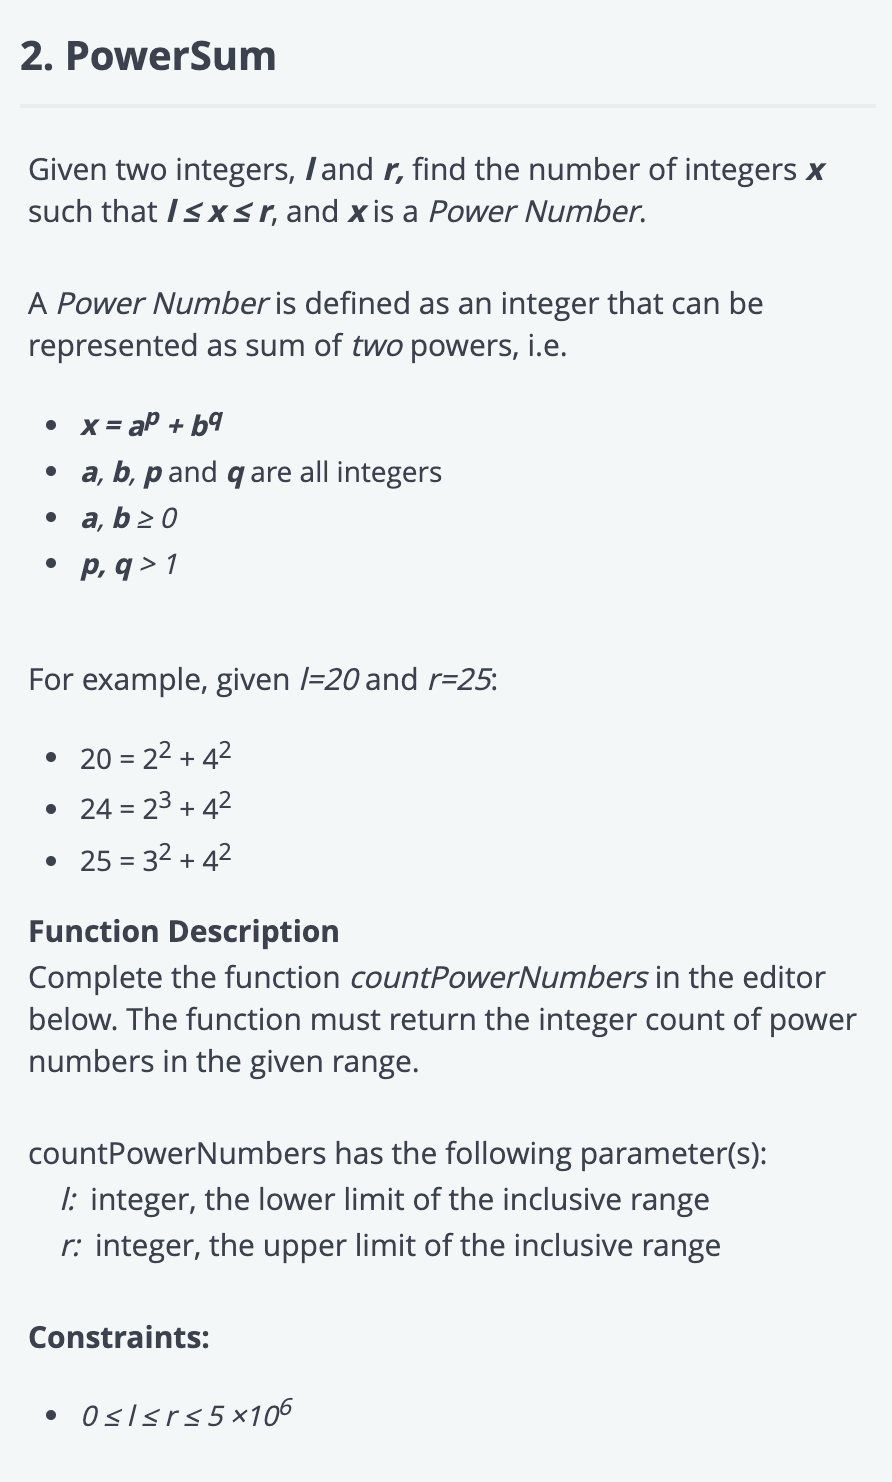

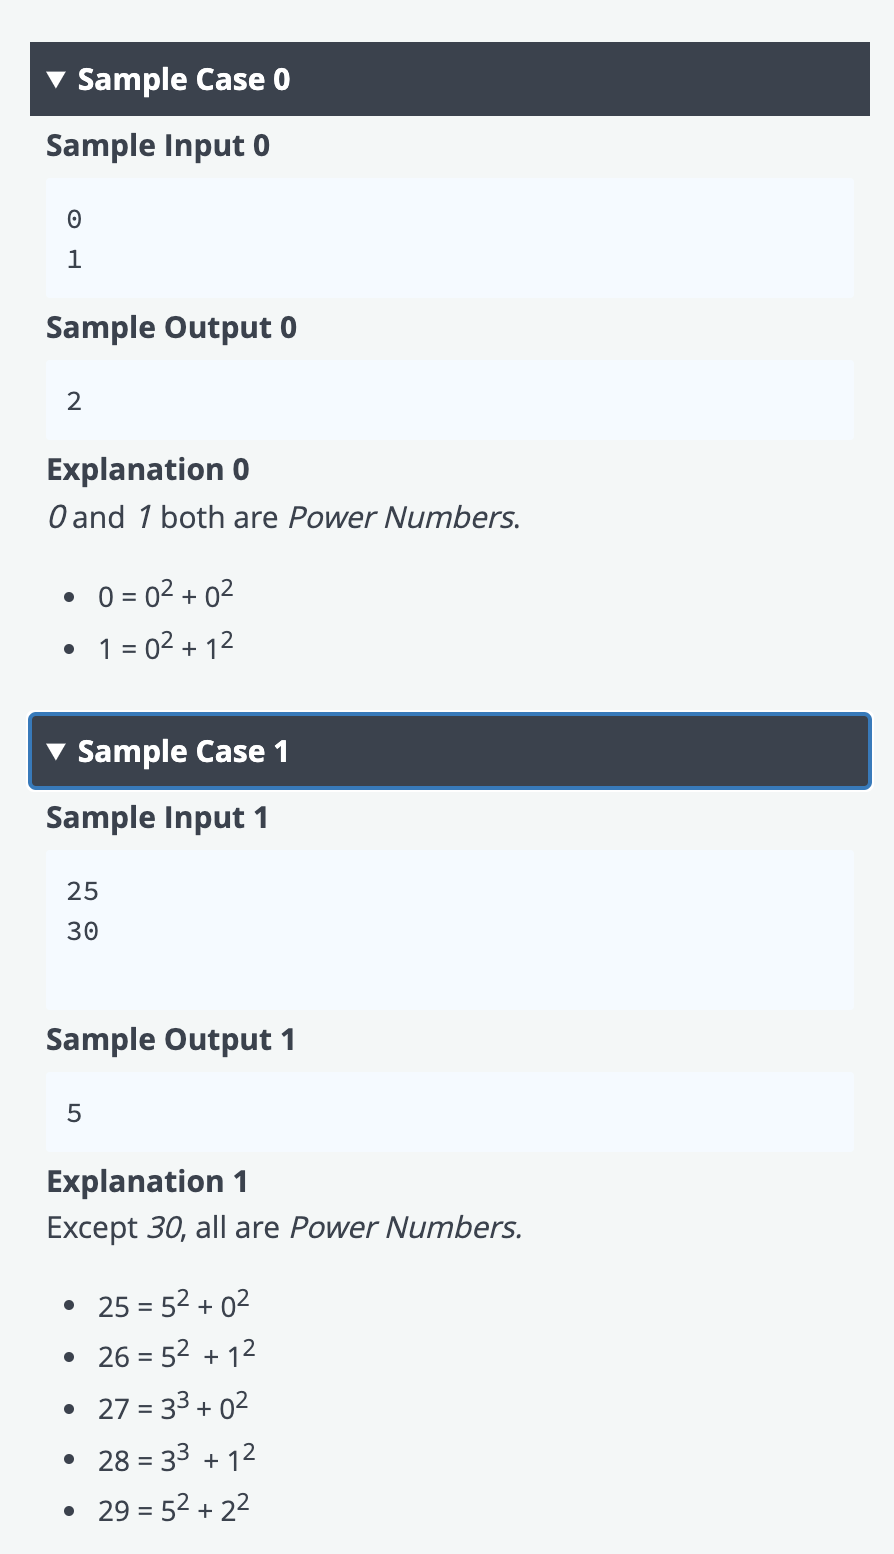

In [ ]:
#!/bin/python3

import math
import os
import random
import re
import sys



#
# Complete the 'countPowerNumbers' function below.
#
# The function is expected to return an INTEGER.
# The function accepts following parameters:
#  1. INTEGER l
#  2. INTEGER r
#

def countPowerNumbers(l, r):
    # Write your code here
    lst = [0,1]
    power = round(math.log2(r))
    base = round(math.sqrt(r))
    for i in range(2, base+1):
        for j in range(2, power+1):
            k = i ** j
            if k <= r:
                lst.append(k)
    
    pos = set()
    for i in lst:
        for j in lst:
            pos.add(i + j)
    
    ans = []
    for i in pos:
        if i <= r and i >= l:
            ans.append(i)
    return len(ans)

if __name__ == '__main__':
    fptr = open(os.environ['OUTPUT_PATH'], 'w')

    l = int(input().strip())

    r = int(input().strip())

    result = countPowerNumbers(l, r)

    fptr.write(str(result) + '\n')

    fptr.close()

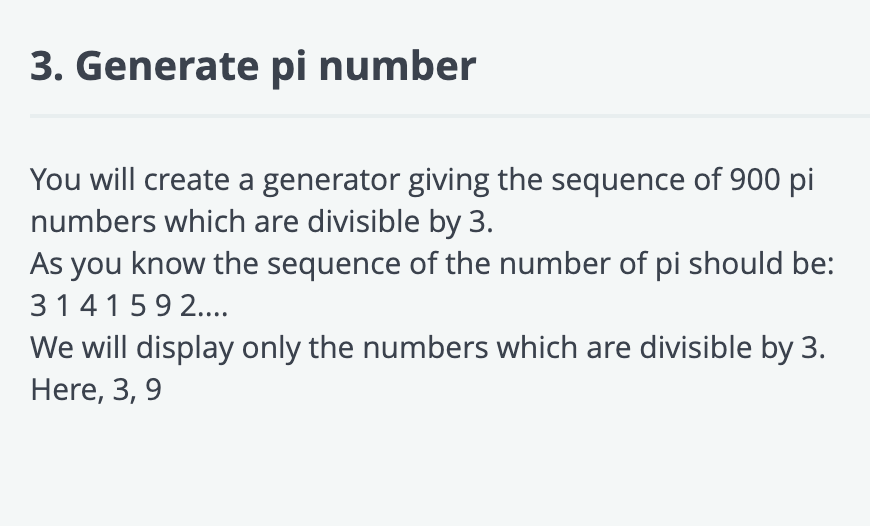

In [ ]:
from mpmath import mp
def make_pi():
    mp.dps = 3000
    x = str(mp.pi).replace('.','')
    ct = 0
    for i in x:
        if ct == 900:
            break
        if int(i) % 3 == 0:
            yield int(i)
            ct += 1
# generator code
    


print([a for a in make_pi()])

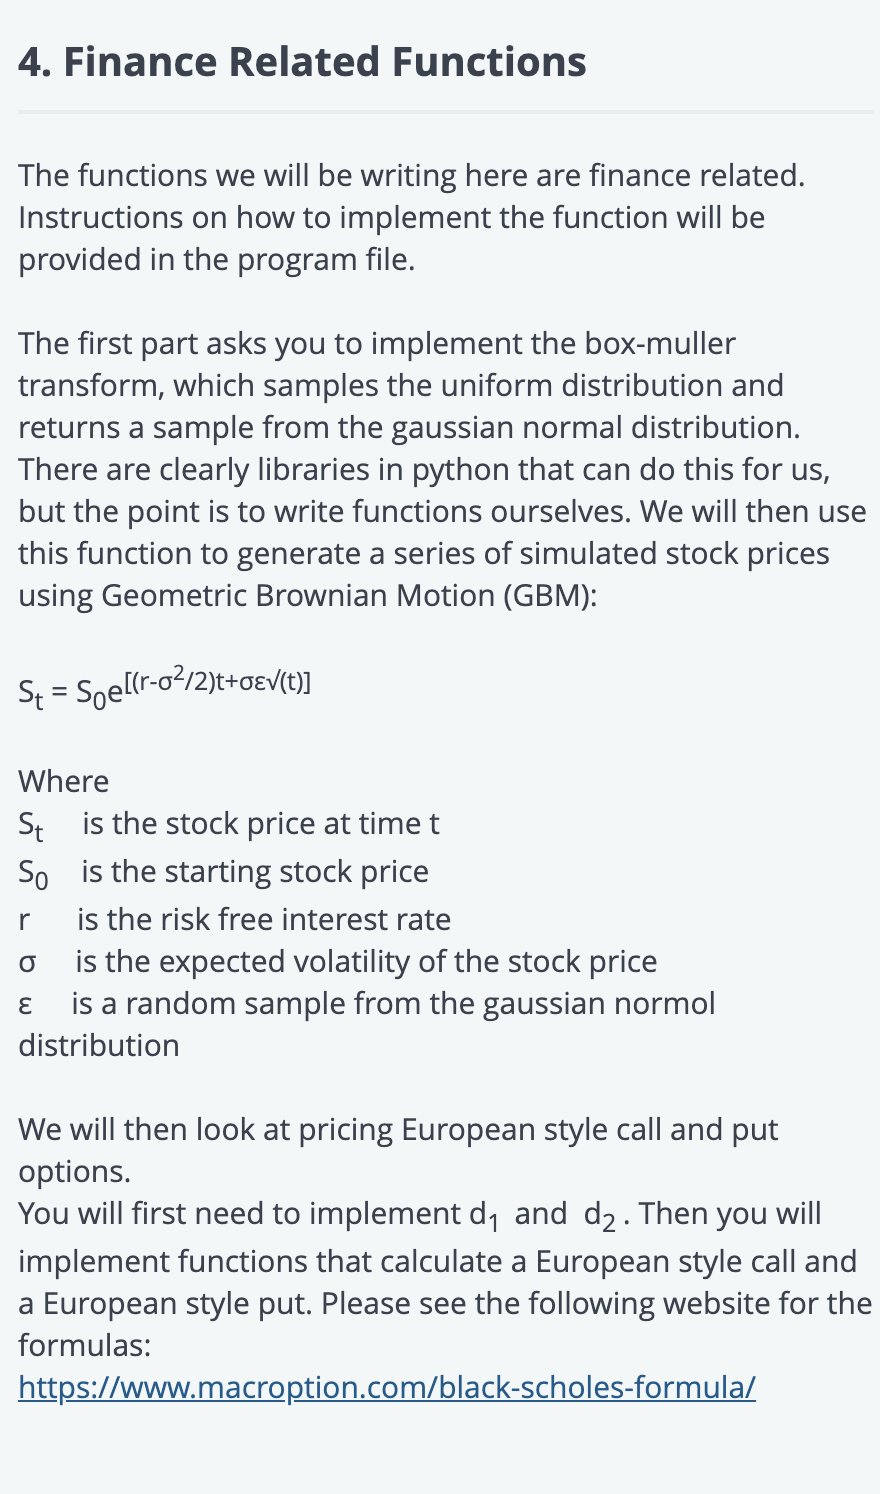

In [ ]:
import sys
import inspect
import random
import math
import statistics
# 1. Create a function called box_muller which implements the box-muller transform. see more details here: 
# https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform

# write function here
def box_muller():
    x1 = random.random()
    x2 = random.random()
    z_1 = math.sqrt(-2*math.log(x1))*math.cos(2*math.pi*x2)
    return z_1
# 2. Create a function called simulate_stock_path which takes a starting stock price, volatility, interest rate, 
# and number of steps, and returns a list of the path of the stock price in sequential order. 
# The number of time steps shoud implement a default value. See instructions for the formula to get the ith stock price at time t.

# write function here
def simulate_stock_path(S_0, vol, r, steps=0):
    lst = []
    for i in range(steps):
        S_t = S_0*math.exp((r-vol**2/2)*i+vol*math.sqrt(i)*box_muller())
        lst.append(S_t)
    return lst

# 3. You won't need to implement the normal cumulative distribution function. It has been done for you, below. 
# However if you are curious to look under the hood to understand the details, please visit: 
# https://malishoaib.wordpress.com/2014/04/02/python-code-and-normal-distribution-writing-cdf-from-scratch/

def norm_cdf(x):
    k = 1/(1+0.2316419*x)
    k_sum = k*(0.319381530+k*(-0.356563782 + k*(1.781477937 + k*(-1.821255978+1.330274429*k))))
    if x >= 0:
        return 1-(1/math.pow(2*math.pi,0.5))*math.exp(-0.5*x*x)*k_sum
    else:
        return 1-norm_cdf(-x)

# 4. Create a function, d_i, that calculates d1 and d2 of the black-scholes option pricing formula. This function 
# should be called in the following way.
# d1 = d_i(i, S, K, v, r, T); where the first argument specifies if you want to calculate d1 or d2. i.e. i = 1 or 2
# Also, see if you can implement this function in just one line of code.

# write function here

def d_i(i, S, K, v, r, T):
    d_1 = (math.log(S/K)+T*(r+v**2/2)) / (v*math.sqrt(T))
    d_2 = d_1-v*math.sqrt(T)
    if i == 1:
        return d_1
    elif i == 2:
        return d_2
        

# 5. Create a function that calculates a European call price. 
# write function here
def call_price(S, K, v, r, T):
    d_1 = d_i(1, S, K, v, r, T)
    d_2 = d_i(2, S, K, v, r, T)
    C = S * norm_cdf(d_1) - K* math.exp(-r*T)*norm_cdf(d_2)
    return C

# 6. Create a function that caluclates a European put price.
# write function here
def put_price(S, K, v, r, T):
    d_1 = d_i(1, S, K, v, r, T)
    d_2 = d_i(2, S, K, v, r, T)
    P = K* math.exp(-r*T)*norm_cdf(-d_2) - S * norm_cdf(-d_1)
    return P
def test_box_muller():
    zs = []
    n = 100000
    for _ in range(n):
        z = round(box_muller(),4)
        # sys.stdout.write(str(z)+'\n')
        zs.append(z)
    avg = statistics.mean(zs)
    sys.stdout.write(f"mu = {round(avg, 4)}\n")
    stdev = statistics.stdev(zs)
    sys.stdout.write(f"sigma = {round(stdev, 4)}")
    
def test_stock_path():
    n = int(sys.stdin.readline().strip())
    for _ in range(n):
        args = list(map(float, sys.stdin.readline().strip().split(" ")))
        args[-1] = int(args[-1])
        stk_path = simulate_stock_path(*args)
        stk_path = map(str, map(round, stk_path, [4]*len(stk_path)))
        sys.stdout.write(' '.join(stk_path)+'\n')
        
def test_d_i():
    n = int(sys.stdin.readline().strip())
    for i in range(n):
        args = list(map(float, sys.stdin.readline().strip().split(" ")))
        d = round(d_i(*args), 4)
        print(d)

def test_call_price():
    n = int(sys.stdin.readline().strip())
    for i in range(n):
        args = list(map(float, sys.stdin.readline().strip().split(" ")))
        cp = round(call_price(*args), 4)
        print(cp) 

def test_put_price():
    n = int(sys.stdin.readline().strip())
    for i in range(n):
        args = list(map(float, sys.stdin.readline().strip().split(" ")))
        pp = round(put_price(*args), 4)
        print(pp) 
        
def mock(*args, **kwargs):
	return None 

def setup():
    import random
    random.gauss = mock

if __name__ == '__main__':
    setup()
    random.seed(1)
    test_name = sys.stdin.readline().strip()
    test_func = globals()[test_name]
    
    test_func()